# pandas 数据结构
节选自 https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro


In [1]:
import numpy as np
import pandas as pd

## Series
一维的带标签的数组，轴向的 labels 即 **index**，创建 Series 的基本方法：

In [2]:
# s = pd.Series(data, index=index)

`data` 可以是：

- dict
- ndarray
- 标量

`index` 是传入的轴向坐标，默认值为 `[0, ..., len(data) - 1]`

### 由 ndarry 初始化

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "c", "e"]) # index 可以相同
s

a    3.555143
b    0.475205
c   -3.254779
c   -1.324658
e   -0.291838
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'c', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0    0.275180
1    0.640929
2   -0.143400
3    1.390476
4    1.030188
dtype: float64

### 由 dict 生成

In [6]:
d = {'a': 1, "b" : 32, 'c' : 31}
pd.Series(d)

a     1
b    32
c    31
dtype: int64

如果使用了 `index` 参数，则生成的 `Series` 变量中标签和 `dict` 中 `key` 相同值的行会被赋值，其余则为 `None`

In [7]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
print(pd.Series(d))
pd.Series(d, index=['c', 'b', 'd', 'e'])

a    0.0
b    1.0
c    2.0
dtype: float64


c    2.0
b    1.0
d    NaN
e    NaN
dtype: float64

### Series 与 ndarray 十分类似
对于 NumPy 中的函数许多都可以使用

In [8]:
print(s.iloc[0]) # 数组操作
s.iloc[:3]

3.5551425929990335


a    3.555143
b    0.475205
c   -3.254779
dtype: float64

In [9]:
s[s > s.median()]

a    3.555143
b    0.475205
dtype: float64

In [10]:
print(type(np.exp(s)))
np.exp(s)

<class 'pandas.core.series.Series'>


a    34.992809
b     1.608344
c     0.038589
c     0.265894
e     0.746890
dtype: float64

和 NumPy 一样，pandas 的 `Series` 只有一个 `dtype`

In [11]:
s.dtype

dtype('float64')

如果需要真实的 `array` 使用 `Series.array`，如果需要真实的 `ndarray` 使用 `Series.to_numpy()`

In [12]:
print(s.array)
s.to_numpy()

<PandasArray>
[ 3.5551425929990335, 0.47520508654014093, -3.2547787973782283,
 -1.3246580070543572, -0.2918376670335268]
Length: 5, dtype: float64


array([ 3.55514259,  0.47520509, -3.2547788 , -1.32465801, -0.29183767])

### Series 像 dict
就像字典一样可以使用 index label 来设置值

In [13]:
s['a'] = 44442
print(s['a'])
print(s)

44442.0
a    44442.000000
b        0.475205
c       -3.254779
c       -1.324658
e       -0.291838
dtype: float64


In [14]:
'e' in s # dict 也可用 key in dic 来判断是否在其中

True

In [15]:
# 与 dict 中的 key 不存在相同，如果在 Series 中 key 不存在会报错，故用 get()
print(s.get('f')) # 如果 key 不存在会返回 None
s.get('f', default=np.nan) # 如果不存在就返回 default 参数指定的数据

None


nan

### Series 的向量化操作与 label alignment
这与 Numpy，Pytorch 很相似，都可以展开！！！

In [16]:
s + s

a    88884.000000
b        0.950410
c       -6.509558
c       -2.649316
e       -0.583675
dtype: float64

In [17]:
s * 2

a    88884.000000
b        0.950410
c       -6.509558
c       -2.649316
e       -0.583675
dtype: float64

In [18]:
np.exp(s / 1000)

a    1.999472e+19
b    1.000475e+00
c    9.967505e-01
c    9.986762e-01
e    9.997082e-01
dtype: float64

和 ndarray 的主要区别是 `Series`会自动对齐 `label` 进行操作

In [19]:
s.iloc[1:] + s.iloc[:-1] # 注意到这里此前 index 设置了不唯一，当不唯一的情况不会合并标签 c

a         NaN
b    0.950410
c   -6.509558
c   -4.579437
c   -4.579437
c   -2.649316
e         NaN
dtype: float64

In [20]:
s.drop('c') # 会将 label 为 c 的全部删除

a    44442.000000
b        0.475205
e       -0.291838
dtype: float64

### Name 属性
具有 attribute `name`

In [21]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -1.219141
1   -1.336352
2    0.276542
3    0.386296
4   -1.918441
Name: something, dtype: float64

In [22]:
s.name

'something'

`Series` `name` 在许多时候会被自动命名，比如在 `DataFrame` 中取出一列时，column 的名称会被自动作为 `name`，也可以使用 `Series.rename()`来重命名

In [23]:
s2 = s.rename('diff') # s2 和 s 会指向不同的 objects
s2.name

'diff'

## DataFrame
是一个 2D 的带标签数据，且 columns 可能是不同的数据类型
多种作为输入：
- 由一维的 ndarrays / lists / dicts / `Series` 组成的 dict
- 2D numpy.ndarray
- structured 或 record ndarray: https://numpy.org/doc/stable/user/basics.rec.html
- `Series`
- 另一个 `DataFrame`

除了传入数据外，还可以同时传入 `index`(row labels) 和 `columns`(column labels)

### 根据 `Series` 或 `dicts` 的字典（dict）初始化
**index** 会是所有的 `Series` 的 **union**（最大化保留数据原则），字典的 `keys` 会自动作为 `columns` 的列名（若未特殊指定 `columns`）

In [24]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [25]:
pd.DataFrame(d, index=["d", "b", "a"]) # 若 index 中不存在的 label 如 c，则不会构建在 df 中

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [26]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


行列的 `label` 分别通过 **index** 和 **column** 属性来访问：

In [27]:
print(df.index)
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')


Index(['one', 'two'], dtype='object')

### 根据 ndarrays / lists 的 dict 进行构建
所有的 ndarrays 都必须由同样的长度。`index` 参数的长度也必须相同，如果没有传入，则会 default 为 `range(len(ndarray_instance))`

In [28]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [29]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 根据 structured / record array 初始化

In [30]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, 'Hello'), (2, 3.0, 'world')]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'world'


In [31]:
print(pd.DataFrame(data, index=["first", "second"]))
pd.DataFrame(data, columns=["C", "A", "B"])

        A    B         C
first   1  2.0  b'Hello'
second  2  3.0  b'world'


,C,A,B
0,b'Hello',1,2.0
1,b'world',2,3.0


### 使用由 dicts 组成的列表初始化

In [32]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


### 使用由 tuple 组成的 dict 初始化

In [33]:
# 也就是 multiIndex
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### 根据一堆 Series 初始化
index 将会和输入的 Series 相同，有一列列名会默认与 Series 的 name 相同 

In [34]:
ser = pd.Series(np.random.randn(3), index=list("abc"), name="ser")  # 注意 list(string) 若 string 是字符串会自动拆分为单个字符
pd.DataFrame(ser)

,ser
a,0.346199
b,2.025729
c,0.191561


### column 选择，添加与删除

In [35]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [36]:
df["three"] = df["one"] * df["two"]
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [37]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


与 `dict` 十分类似，列可以被 `del` 或 `pop`

In [38]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [39]:
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


与 numpy 类似，会有 `broadcasting` 现象，比如传递一个标量会填满整个 column

In [40]:
df['foo'] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


当插入一个 `Series` 没有和 `DataFrame` 相同的 index 的时候，会被转换为 DataFrame 的 index

In [41]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


也可以直接插入 ndarray 但是长度必须和 index 一致：

In [42]:
df['nd'] = [i for i in range(4)]
df

,one,flag,foo,one_trunc,nd
a,1.0,False,bar,1.0,0
b,2.0,False,bar,2.0,1
c,3.0,True,bar,NaN,2
d,NaN,False,bar,NaN,3


新添加的 columns 会默认放在末尾， `DataFrame.insert()` 会插入到 columns 的特定位置：

In [43]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc,nd
a,1.0,1.0,False,bar,1.0,0
b,2.0,2.0,False,bar,2.0,1
c,3.0,3.0,True,bar,NaN,2
d,NaN,NaN,False,bar,NaN,3


In [44]:
iris = pd.read_csv('../Data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


`assign()` 可以从已有列中新建列

In [45]:
iris.assign(sepal_ratio=iris['SepalWidthCm'] / iris['SepalLengthCm']).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


也可以传入一个具有一个参数的函数在被赋值的 DataFrame 上评估

In [46]:
iris.assign(sepal_ratio=lambda x : (x['SepalWidthCm'] / x['SepalLengthCm'])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

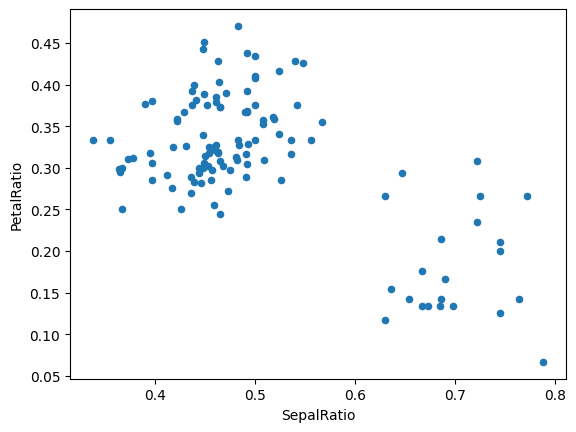

In [47]:
(
    iris.query("SepalLengthCm > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
        PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

注意到，assign 的 function signature 只是 `**kwargs` 即参数为可变变量，可以通过 `arg1=xxx`使得 kwargs 中具有 `arg1` 这个 key。`**kwargs`的顺序是确定了的，所以刚刚插入的列也可以使用。

In [48]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x['A'] + x['B'], D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


# 索引/选择 Data
**轴向标签信息用处广泛**
- 识别 data，分析，可视化
- 可以使得自动的和显示的 data alignment
- 可以得到 dataset 的子集

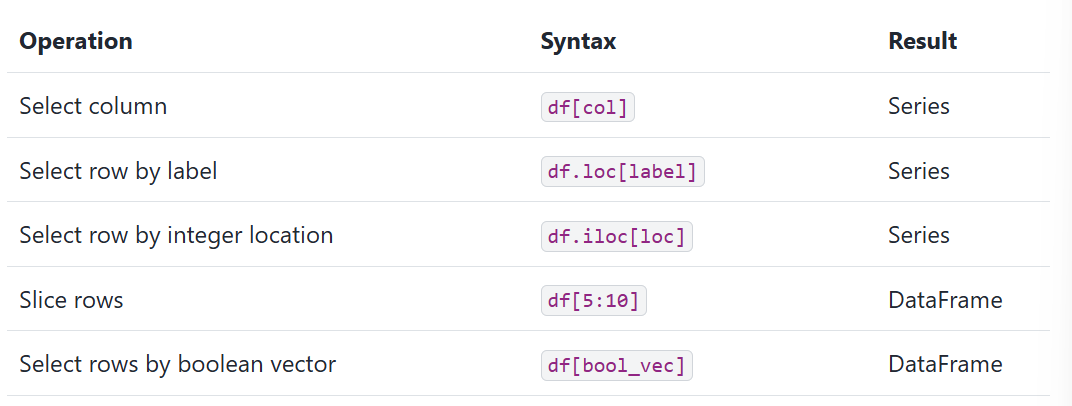

## 不同的 indexing 选择
* `.loc`，可以用 label 也可以 boolean array，不存在会引发 `KeyError`.
> - 单个标签如: `'a'`
> - 一个标签 list 如:`['a', 'b', 'c']`
> - 利用标签进行 slice 如：'a':'f'，和 python 不同，start 和 stop **都会** 包含在内
> - 一个 boolean array
> -  一个 `callable` 的带接受一个参数的函数且返回上方提到的值作为 indexing
> - 一个行（和列）索引的元组，且元素为上述的 input

* `.iloc`，数字索引，也可用 boolean array，如果超出了 index 的 bounds 会 `IndexError`.
> - 一个整型 如：`5`
> - 一个整型的 list 如：`[4, 3, 0]`
> - slice 如： `1:7`
> - 一个 boolean array（`NA` 被处理为 `False`）
> - 一个 `callable` 的带接受一个参数的函数且返回上方提到的值作为 indexing
> - 一个行（和列）索引的元组，且元素为上述的 input

对于没有赋值的轴，会被默认取作 `:`，即 `p.loc['a']` 和 `p.loc['a', :]` 相同

In [49]:
ser = pd.Series(range(5), index=list('abcde'))
ser.loc[['a', 'c', 'e']]

a    0
c    2
e    4
dtype: int64

In [50]:
df = pd.DataFrame(np.arange(25).reshape(5,5), index=list('abcde'), columns=list('abcde'))
df.loc[['a', 'c', 'e'], ['b', 'd']]

,b,d
a,1,3
c,11,13
e,21,23


## 基础
`[]`（a.k.a `__getitem__`） 的操作是选取出更低阶的 slices，如下图：
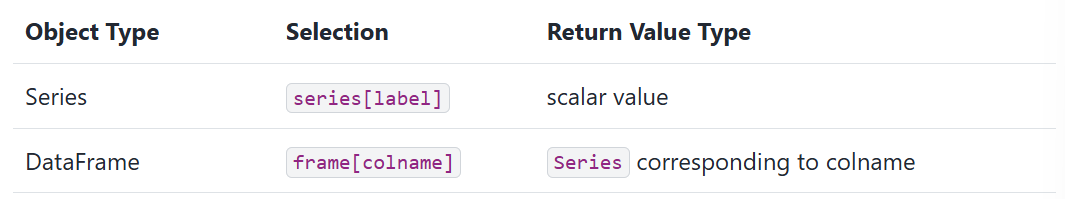

In [51]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8 ,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2000-01-01,-1.831336,-1.891998,-0.541394,0.919290
2000-01-02,-0.895299,-0.376361,-0.928227,-0.791525
2000-01-03,-0.553196,-0.835740,0.030431,-1.446757
2000-01-04,-0.800548,1.217370,0.379667,-1.201447
2000-01-05,-1.457184,-0.188762,1.020774,-0.155567
2000-01-06,-0.169914,-1.060060,-1.445576,-0.773747
2000-01-07,-0.834947,0.298290,0.866092,0.101871
2000-01-08,1.686732,-1.495007,-0.116282,-0.338848


In [52]:
s = df['A']
s[dates[5]]

-0.1699144844094096

对于多个列可以如下操作：

In [53]:
print(df)
df[['B', 'A']] = df[['A', 'B']]
df

                   A         B         C         D
2000-01-01 -1.831336 -1.891998 -0.541394  0.919290
2000-01-02 -0.895299 -0.376361 -0.928227 -0.791525
2000-01-03 -0.553196 -0.835740  0.030431 -1.446757
2000-01-04 -0.800548  1.217370  0.379667 -1.201447
2000-01-05 -1.457184 -0.188762  1.020774 -0.155567
2000-01-06 -0.169914 -1.060060 -1.445576 -0.773747
2000-01-07 -0.834947  0.298290  0.866092  0.101871
2000-01-08  1.686732 -1.495007 -0.116282 -0.338848


,A,B,C,D
2000-01-01,-1.891998,-1.831336,-0.541394,0.919290
2000-01-02,-0.376361,-0.895299,-0.928227,-0.791525
2000-01-03,-0.835740,-0.553196,0.030431,-1.446757
2000-01-04,1.217370,-0.800548,0.379667,-1.201447
2000-01-05,-0.188762,-1.457184,1.020774,-0.155567
2000-01-06,-1.060060,-0.169914,-1.445576,-0.773747
2000-01-07,0.298290,-0.834947,0.866092,0.101871
2000-01-08,-1.495007,1.686732,-0.116282,-0.338848


**注意**，使用 `.loc` 和 `=` 是不能直接交换两列的，是因为轴向对齐发生在赋值之前：

In [54]:
print(df[['A', 'B']])
df.loc[:, ['B', 'A']] = df[['A', 'B']]
df[['A', 'B']]

                   A         B
2000-01-01 -1.891998 -1.831336
2000-01-02 -0.376361 -0.895299
2000-01-03 -0.835740 -0.553196
2000-01-04  1.217370 -0.800548
2000-01-05 -0.188762 -1.457184
2000-01-06 -1.060060 -0.169914
2000-01-07  0.298290 -0.834947
2000-01-08 -1.495007  1.686732


,A,B
2000-01-01,-1.891998,-1.831336
2000-01-02,-0.376361,-0.895299
2000-01-03,-0.835740,-0.553196
2000-01-04,1.217370,-0.800548
2000-01-05,-0.188762,-1.457184
2000-01-06,-1.060060,-0.169914
2000-01-07,0.298290,-0.834947
2000-01-08,-1.495007,1.686732


正确的方式是使用原始数据：

In [55]:
df.loc[:, ['B', 'A']] = df[['A', 'B']].to_numpy()

df[['A', 'B']]

,A,B
2000-01-01,-1.831336,-1.891998
2000-01-02,-0.895299,-0.376361
2000-01-03,-0.553196,-0.835740
2000-01-04,-0.800548,1.217370
2000-01-05,-1.457184,-0.188762
2000-01-06,-0.169914,-1.060060
2000-01-07,-0.834947,0.298290
2000-01-08,1.686732,-1.495007


但是 `.iloc` 不会出现 `.loc` 的情况，因为其不需要列对齐:

In [56]:
print(df[['A', 'B']])

df.iloc[:, [1, 0]] = df[['A', 'B']]

df[['A', 'B']]          

                   A         B
2000-01-01 -1.831336 -1.891998
2000-01-02 -0.895299 -0.376361
2000-01-03 -0.553196 -0.835740
2000-01-04 -0.800548  1.217370
2000-01-05 -1.457184 -0.188762
2000-01-06 -0.169914 -1.060060
2000-01-07 -0.834947  0.298290
2000-01-08  1.686732 -1.495007


,A,B
2000-01-01,-1.891998,-1.831336
2000-01-02,-0.376361,-0.895299
2000-01-03,-0.835740,-0.553196
2000-01-04,1.217370,-0.800548
2000-01-05,-0.188762,-1.457184
2000-01-06,-1.060060,-0.169914
2000-01-07,0.298290,-0.834947
2000-01-08,-1.495007,1.686732


## 访问数据属性
根据 `.` 访问
- 当然，属性不能为一下几种类型：`s.1`,`s.min`以及其他保留的属性（DataFrame，Series 本身有的）
- 且，所指代的属性必须要先存在，如果想要新建一个 column 则不能用属性的方式做

In [57]:
sa = pd.Series([1, 2, 3], index=list('abc'))

dfa = df.copy()

In [58]:
print(sa.b)
dfa.A

2


2000-01-01   -1.891998
2000-01-02   -0.376361
2000-01-03   -0.835740
2000-01-04    1.217370
2000-01-05   -0.188762
2000-01-06   -1.060060
2000-01-07    0.298290
2000-01-08   -1.495007
Freq: D, Name: A, dtype: float64

In [59]:
# 根据属性修改
sa.a = 5
print(sa)
dfa.A = list(range(len(dfa.index)))
dfa

a    5
b    2
c    3
dtype: int64


,A,B,C,D
2000-01-01,0,-1.831336,-0.541394,0.919290
2000-01-02,1,-0.895299,-0.928227,-0.791525
2000-01-03,2,-0.553196,0.030431,-1.446757
2000-01-04,3,-0.800548,0.379667,-1.201447
2000-01-05,4,-1.457184,1.020774,-0.155567
2000-01-06,5,-0.169914,-1.445576,-0.773747
2000-01-07,6,-0.834947,0.866092,0.101871
2000-01-08,7,1.686732,-0.116282,-0.338848


也可以用 `dict` 来作为 `DataFrame` 的一个行：

In [60]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})

x.iloc[1] = {'x': 9, 'y': 99}

x

,x,y
0,1,3
1,9,99
2,3,5


## 切片范围
最 magic 的 `[]` operator

In [61]:
print(s[:5])
print(s[::2])
s[::-1]

2000-01-01   -1.831336
2000-01-02   -0.895299
2000-01-03   -0.553196
2000-01-04   -0.800548
2000-01-05   -1.457184
Freq: D, Name: A, dtype: float64
2000-01-01   -1.831336
2000-01-03   -0.553196
2000-01-05   -1.457184
2000-01-07   -0.834947
Freq: 2D, Name: A, dtype: float64


2000-01-08    1.686732
2000-01-07   -0.834947
2000-01-06   -0.169914
2000-01-05   -1.457184
2000-01-04   -0.800548
2000-01-03   -0.553196
2000-01-02   -0.895299
2000-01-01   -1.831336
Freq: -1D, Name: A, dtype: float64

对于 `DataFrame` 则是用 `[]` 选择行。

In [62]:
print(df[:3])
df[::-1]

                   A         B         C         D
2000-01-01 -1.891998 -1.831336 -0.541394  0.919290
2000-01-02 -0.376361 -0.895299 -0.928227 -0.791525
2000-01-03 -0.835740 -0.553196  0.030431 -1.446757


,A,B,C,D
2000-01-08,-1.495007,1.686732,-0.116282,-0.338848
2000-01-07,0.298290,-0.834947,0.866092,0.101871
2000-01-06,-1.060060,-0.169914,-1.445576,-0.773747
2000-01-05,-0.188762,-1.457184,1.020774,-0.155567
2000-01-04,1.217370,-0.800548,0.379667,-1.201447
2000-01-03,-0.835740,-0.553196,0.030431,-1.446757
2000-01-02,-0.376361,-0.895299,-0.928227,-0.791525
2000-01-01,-1.891998,-1.831336,-0.541394,0.919290


## 使用标签切片
> `.loc` 十分严格，如果使用 integers 在 DateTimeIndex 中使用则会引发 `TypeError`

In [63]:
dfl = pd.DataFrame(np.random.randn(5, 4),
                   columns=list('ABCD'),
                   index=pd.date_range('20130101', periods=5))
print(dfl)
# dfl.loc[2:3]

                   A         B         C         D
2013-01-01 -0.251432 -1.211189 -0.990987 -0.779723
2013-01-02 -0.234344 -0.459086 -1.004859 -1.007937
2013-01-03 -2.100295  0.217887 -1.091935 -0.256250
2013-01-04 -1.638199  0.255084  1.505758 -1.347415
2013-01-05  0.780922  0.037207 -0.229736  0.282137


In [64]:
dfl.loc['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.234344,-0.459086,-1.004859,-1.007937
2013-01-03,-2.100295,0.217887,-1.091935,-0.256250
2013-01-04,-1.638199,0.255084,1.505758,-1.347415


In [65]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
print(s1)
print(s1.loc['c':])
# 同时也可以进行赋值
s1.loc['c':] = 0
s1

a   -0.281608
b    0.320419
c    1.312728
d   -1.651680
e   -1.035973
f   -2.370597
dtype: float64
c    1.312728
d   -1.651680
e   -1.035973
f   -2.370597
dtype: float64


a   -0.281608
b    0.320419
c    0.000000
d    0.000000
e    0.000000
f    0.000000
dtype: float64

In [66]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
print(df1)
df1.loc[['a', 'b', 'c'], :]

          A         B         C         D
a  1.405255 -1.470088  0.707058  0.556565
b  0.226794 -0.677975  0.336121  0.698581
c -0.502789 -1.199632  0.105829 -0.405676
d -0.799255  1.475306 -0.095612 -1.633163
e -0.262815  0.666101  0.432818  1.070583
f -1.196739  1.370491 -0.911250  0.411462


,A,B,C,D
a,1.405255,-1.470088,0.707058,0.556565
b,0.226794,-0.677975,0.336121,0.698581
c,-0.502789,-1.199632,0.105829,-0.405676


In [67]:
# 通过 label 的 slice
print(df1.loc['d':, 'A':'C'])

# 得到交叉部分 和 df.xs('a') 效果相同
print(df1.loc['a'])
df1.xs('a')

          A         B         C
d -0.799255  1.475306 -0.095612
e -0.262815  0.666101  0.432818
f -1.196739  1.370491 -0.911250
A    1.405255
B   -1.470088
C    0.707058
D    0.556565
Name: a, dtype: float64


A    1.405255
B   -1.470088
C    0.707058
D    0.556565
Name: a, dtype: float64

# MultiIndex 层次化索引
## 创建 MultiIndex Obj
一个由 tuples 组成的列表，且每个 tuple 都是唯一的。
- `pd.MultiIndex.from_arrays()`
- `pd.MultiIndex.from_tuples()`
- `pd.MultiIndex.from_product()`
- `pd.MultiIndex.from_frame()`

In [68]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

# *arrays 表示解包函数，zip 表示逐元素配对组合，结果是元组列表
tuples = list(zip(*arrays))

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [69]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [70]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -0.788776
       two      -0.782407
baz    one       0.088966
       two       2.196748
foo    one      -0.702395
       two       0.601752
qux    one      -0.306461
       two       0.940319
dtype: float64

同时如果你需要两个可迭代集合中的每个配对，可以使用 from_product()

In [71]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
pd.MultiIndex.from_product(iterables, names=["first", "second"])

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

也可以直接从 `DataFrame` 中直接构建：

In [72]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"],
)
print(df)
pd.MultiIndex.from_frame(df)

  first second
0   bar    one
1   bar    two
2   foo    one
3   foo    two


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

更方便的构造 `Series` 或 `DataFrame` 的过程中自动采用 `MultiIndex`，传递一个由 array 组成的 list

In [73]:
arrays = [
    np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
    np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
]
s = pd.Series(np.random.randn(8), index=arrays)
print(s)
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

bar  one    1.789862
     two    0.752315
baz  one   -0.493914
     two   -1.050850
foo  one   -0.072212
     two    0.715477
qux  one   -0.367162
     two    0.781413
dtype: float64


0         1         2         3
bar one  0.634739 -0.354264  0.942914 -1.334285
    two -0.218423 -0.276980 -0.117450 -0.104719
baz one -0.530598  0.952550  0.005443  0.765474
    two  1.224359  0.247148 -0.024585  1.172929
foo one  1.192576  0.045054  0.135321  1.357845
    two  1.240415 -1.595178  0.940910 -1.898209
qux one  0.015723  0.510487 -0.291217 -0.099803
    two  0.129531 -0.259850  0.619131 -0.275005

对于 MultiIndex 的构造器，可以指定一个 `names` 的参数，若未指定则 `None`

In [74]:
df.index.names

FrozenList([None, None])

索引可以支持 pandas 对象的任何轴（columns 也可以），层数由用户决定：

In [75]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)

df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328

## 重塑层级 labels
`get_level_values(n)`会返回一个包含 `MultiIndex` 变量每个位置的第 `n` 层级索引值的列表

In [76]:
print(index)
index.get_level_values(0)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

In [77]:
index.get_level_values('second')

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

## 使用 MultiIndex 进行基础的索引
可以根据**一部分**的 label 进行识别数据的一个 subgroup：

In [78]:
print(df)
df['bar']

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328  


second,one,two
A,0.515448,-0.700512
B,0.545639,1.085241
C,0.929922,-0.427700


In [79]:
df['bar', 'one'] # 是一个 Series
# type(df['bar', 'one'])

A    0.515448
B    0.545639
C    0.929922
Name: (bar, one), dtype: float64

In [80]:
df['bar']['one'] # 相当于从第一层选 'bar' 后生成的 DF 再从该 DF 中选择 'one'

A    0.515448
B    0.545639
C    0.929922
Name: one, dtype: float64

In [81]:
print(s)
s['qux']

bar  one    1.789862
     two    0.752315
baz  one   -0.493914
     two   -1.050850
foo  one   -0.072212
     two    0.715477
qux  one   -0.367162
     two    0.781413
dtype: float64


one   -0.367162
two    0.781413
dtype: float64

## 定义 levels （索引层级）
`MultiIndex` 会保留所有索引的所有定义的 levels，尽管他们可能没被使用，比如：

In [82]:
print(df)
print('\n', df.columns.levels) # 原始的 MultiIndex

print('\n', df[['foo', 'qux']], '\n')
df[['foo', 'qux']].columns.levels # 经过切片，发现两者是一样的，尽管切片后已经不存在 bar 和 baz

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328  

 [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]

 first        foo                 qux          
second       one       two       one       two
A       0.017231 -0.773707  0.644001  0.388935
B       0.566660 -2.775674  1.034946 -0.329437
C      -0.878089  0.116556 -0.758981 -0.794328 



FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

这么做是为了避免 levels 的重复计算来获取更高的性能，如果只想要得到使用的 levels 则使用 `get_level_values()`

In [83]:
df[["foo", "qux"]].columns.to_numpy()

array([('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')],
      dtype=object)

In [84]:
df[["foo", "qux"]].columns.get_level_values(0)

Index(['foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

如果想要**重塑** `MultiINdex`，使其只包含已使用的 levels，则使用 `remove_unused_levels()`：

In [85]:
new_mi = df[["foo", "qux"]].columns.remove_unused_levels()

new_mi.levels

FrozenList([['foo', 'qux'], ['one', 'two']])

## Cross-Section 交叉区域
`DataFrame` 的 `xs()` 方法接收一个层级的参数并选择在某个特定层级的数据：

In [86]:
# 将 df 转置一下
print(df)
df = df.T
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328  


A         B         C
first second                              
bar   one     0.515448  0.545639  0.929922
      two    -0.700512  1.085241 -0.427700
baz   one     0.301299  0.742409 -0.623823
      two     0.198850  0.351462 -0.060027
foo   one     0.017231  0.566660 -0.878089
      two    -0.773707 -2.775674  0.116556
qux   one     0.644001  1.034946 -0.758981
      two     0.388935 -0.329437 -0.794328

In [87]:
df.xs("one", level="second")

,A,B,C
first,,,
bar,0.515448,0.545639,0.929922
baz,0.301299,0.742409,-0.623823
foo,0.017231,0.566660,-0.878089
qux,0.644001,1.034946,-0.758981


同时也可以通过 `xs` 选择 columns，将 `axis` 设置为 1

In [88]:
df = df.T
print(df)
df.xs('one', level='second', axis=1)

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328  


first,bar,baz,foo,qux
A,0.515448,0.301299,0.017231,0.644001
B,0.545639,0.742409,0.566660,1.034946
C,0.929922,-0.623823,-0.878089,-0.758981


`xs` 也可以使用多个 key 来进行选择：

In [89]:
df.xs(("one", "bar"), level=("second", "first"), axis=1)

first,bar
second,one
A,0.515448
B,0.545639
C,0.929922


`drop_level=True` 是默认的，即 `xs` 选择的 level 的值会被忽略，如果像保留则设置为 `False`：

In [90]:
df.xs('one', level='second', axis=1, drop_level=False)

first,bar,baz,foo,qux
second,one,one,one,one
A,0.515448,0.301299,0.017231,0.644001
B,0.545639,0.742409,0.566660,1.034946
C,0.929922,-0.623823,-0.878089,-0.758981


## 通过 `swaplevel` 来交换层级

In [91]:
df = df.T
df[:5]

A         B         C
first second                              
bar   one     0.515448  0.545639  0.929922
      two    -0.700512  1.085241 -0.427700
baz   one     0.301299  0.742409 -0.623823
      two     0.198850  0.351462 -0.060027
foo   one     0.017231  0.566660 -0.878089

In [92]:
df[:5].swaplevel(0, 1, axis=0).sort_index() # 可以根据 index 排序整合

A         B         C
second first                              
one    bar    0.515448  0.545639  0.929922
       baz    0.301299  0.742409 -0.623823
       foo    0.017231  0.566660 -0.878089
two    bar   -0.700512  1.085241 -0.427700
       baz    0.198850  0.351462 -0.060027

## 通过 `reorder_levels` 进行 levels 的重排
`reorder_levels()` 整合了 `swaplevel`，允许一步改变层级： 

In [93]:
df[:5].reorder_levels([1, 0], axis=0)

,,A,B,C
second,first,,,
one,bar,0.515448,0.545639,0.929922
two,bar,-0.700512,1.085241,-0.427700
one,baz,0.301299,0.742409,-0.623823
two,baz,0.198850,0.351462,-0.060027
one,foo,0.017231,0.566660,-0.878089


## 根据 `MultiIndex` 来排序
`sort_index()`

In [94]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
import random
random.shuffle(tuples) # 将元组打乱
s = pd.Series(np.random.randn(8), index=pd.MultiIndex.from_tuples(tuples))
s

foo  two    1.107549
baz  two   -0.819354
qux  two    0.374674
baz  one   -1.467010
bar  one    0.875600
foo  one    1.460846
qux  one    0.359124
bar  two   -0.187946
dtype: float64

In [96]:
s.sort_index()

bar  one    0.875600
     two   -0.187946
baz  one   -1.467010
     two   -0.819354
foo  one    1.460846
     two    1.107549
qux  one    0.359124
     two    0.374674
dtype: float64

In [97]:
s.sort_index(level=0)

bar  one    0.875600
     two   -0.187946
baz  one   -1.467010
     two   -0.819354
foo  one    1.460846
     two    1.107549
qux  one    0.359124
     two    0.374674
dtype: float64

In [98]:
s.sort_index(level=1)

bar  one    0.875600
baz  one   -1.467010
foo  one    1.460846
qux  one    0.359124
bar  two   -0.187946
baz  two   -0.819354
foo  two    1.107549
qux  two    0.374674
dtype: float64

也可以使用 level 的名称排序:

In [99]:
s.index = s.index.set_names(['L1', 'L2'])
s.sort_index(level='L1')

L1   L2 
bar  one    0.875600
     two   -0.187946
baz  one   -1.467010
     two   -0.819354
foo  one    1.460846
     two    1.107549
qux  one    0.359124
     two    0.374674
dtype: float64

同样的，也可以排序 columns：

In [100]:
print(df)
df.T.sort_index(level='first', axis=1)

                     A         B         C
first second                              
bar   one     0.515448  0.545639  0.929922
      two    -0.700512  1.085241 -0.427700
baz   one     0.301299  0.742409 -0.623823
      two     0.198850  0.351462 -0.060027
foo   one     0.017231  0.566660 -0.878089
      two    -0.773707 -2.775674  0.116556
qux   one     0.644001  1.034946 -0.758981
      two     0.388935 -0.329437 -0.794328


first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.515448 -0.700512  0.301299  0.198850  0.017231 -0.773707  0.644001   
B       0.545639  1.085241  0.742409  0.351462  0.566660 -2.775674  1.034946   
C       0.929922 -0.427700 -0.623823 -0.060027 -0.878089  0.116556 -0.758981   

first             
second       two  
A       0.388935  
B      -0.329437  
C      -0.794328

# Reshaping 和 pivot tables（透视表）
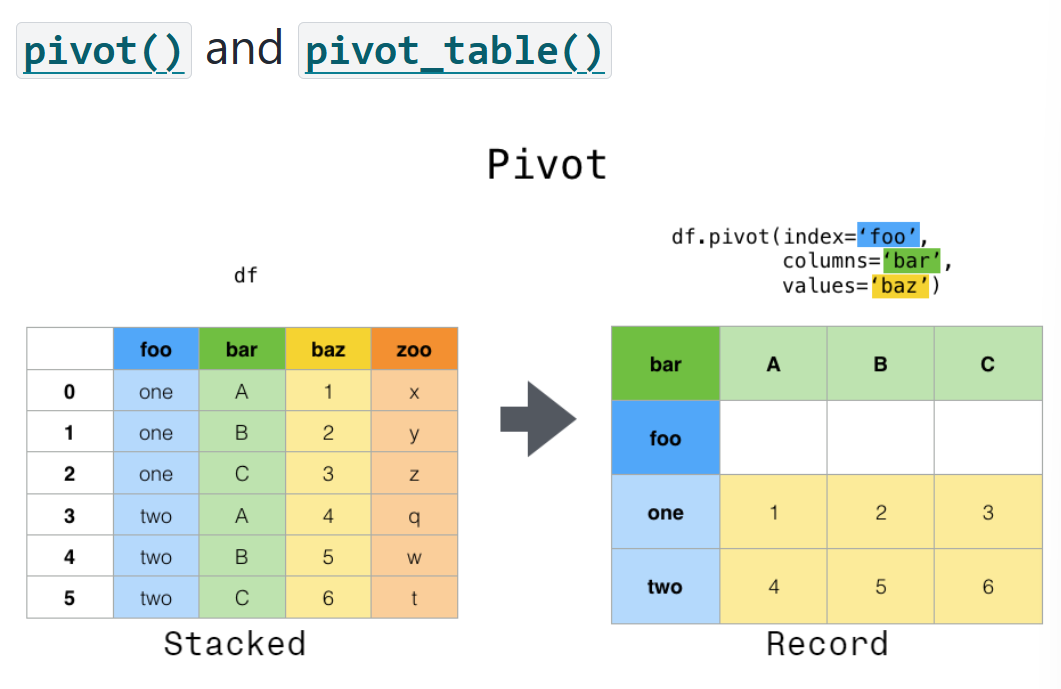
简单说就是让某个列（column）的取值变成行索引或列索引或值

## `pivot()`

In [101]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


为了表示不同时间对于变量（variable）的操作，更好的表示方式是 `columns` 是这些变量而 `index` 是时间，为了将数据改造为此种形式，使用 `DataFrame.pivot()`:

In [102]:
# 注意这个操作返回的是一个 DataFrame，且 pivot 不能在原 DF 为 MultiIndex 下进行
# 且 pivot 的 columns 选定的列的值必须要不重复
pivoted = df.pivot(index='date', columns='variable', values='value')
pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


如果参数 `values` 没有传入，且输入的 `DataFrame` 有超过一列的 values 并没有被用作 column 或 index，那么会出现具有 MultiIndex 的 columns：

In [103]:
df["value2"] = df["value"] * 2
pivoted = df.pivot(index="date", columns="variable")
pivoted

value           value2            
variable       A  B  C   D      A   B   C   D
date                                         
2020-01-03     0  3  6   9      0   6  12  18
2020-01-04     1  4  7  10      2   8  14  20
2020-01-05     2  5  8  11      4  10  16  22

## `pivot_table()`
`pivot_table()` 则是专门用于数据的聚合操作：

In [104]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,0.651232,1.773483,2013-01-01
1,one,B,foo,-0.672246,0.951279,2013-02-01
2,two,C,foo,0.516505,-0.401428,2013-03-01
3,three,A,bar,-0.100747,0.004443,2013-04-01
4,one,B,bar,0.949774,0.870742,2013-05-01
5,one,C,bar,-0.455152,-0.612162,2013-06-01
6,two,A,foo,1.664678,-0.139050,2013-07-01
7,three,B,foo,-0.443938,-1.001369,2013-08-01
8,one,C,foo,0.669559,-0.215666,2013-09-01
9,one,A,bar,-1.819039,-1.044425,2013-10-01


In [105]:
pd.pivot_table(df, values='D', index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A -0.671685  0.730994
      B  0.311724 -1.017602
      C -0.767823  0.192675
three A -0.080590       NaN
      B       NaN  0.063596
      C -0.340904       NaN
two   A       NaN -0.116678
      B -0.785906       NaN
      C       NaN -0.280350

In [106]:
# 指定 aggfunc 进行操作
pd.pivot_table(
    df, values=["D", "E"],
    index=["B"],
    columns=["A", "C"],
    aggfunc="sum",
)

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A -1.343371  1.461988 -0.161180       NaN       NaN -0.233356 -0.624359   
B  0.623447 -2.035205       NaN  0.127193 -1.571812       NaN  1.029946   
C -1.535646  0.385351 -0.681808       NaN       NaN -0.560700 -2.275496   

                                                    
A               three                two            
C       foo       bar       foo      bar       foo  
B                                                   
A  3.431506 -0.372941       NaN      NaN -0.754023  
B  0.840410       NaN  1.349634 -0.11455       NaN  
C -0.936012 -1.321673       NaN      NaN -0.421294

In [107]:
pd.pivot_table(
    df, values="E",
    index=["B", "C"],
    columns=["A"],
    aggfunc=["sum", "mean"],
)

sum                          mean                    
A           one     three       two       one     three       two
B C                                                              
A bar -0.624359 -0.372941       NaN -0.312180 -0.186471       NaN
  foo  3.431506       NaN -0.754023  1.715753       NaN -0.377011
B bar  1.029946       NaN -0.114550  0.514973       NaN -0.057275
  foo  0.840410  1.349634       NaN  0.420205  0.674817       NaN
C bar -2.275496 -1.321673       NaN -1.137748 -0.660836       NaN
  foo -0.936012       NaN -0.421294 -0.468006       NaN -0.210647

# Group by：分割-应用-整合
- 根据门类**分割**数据
- 对每个 group 独立地**应用**函数
- 将结果**整合**存储到数据结构中

我们可能用到的操作：
- **聚合**：计算数值的统计信息，如：
> - group sums or means
> - group sizes / counts.

- **变换**：一些基于分组的计算，如：
> - 标准化组内数据
> - 根据每个组中信息填充 NAs

- **筛选**：以组为单位筛选，如：
> - 丢弃组内一些取值特殊的
> - 根据组内平均值筛选数据

## 以组分割数据

In [108]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [109]:
grouped = speeds.groupby("class") # groupby 后的数据是不能直接查看的

In [110]:
grouped = speeds.groupby(['class', 'order'])

In [111]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.805364,-1.251228
1,bar,one,-2.618873,0.182393
2,foo,two,-0.067018,-0.314270
3,bar,three,-1.544230,0.801179
4,foo,two,-0.165879,-0.324945
5,bar,two,-1.067598,-0.459163
6,foo,one,-0.085292,-0.810569
7,foo,three,1.450323,-0.457832


通过 `groupby()` 我们得到的是一个 GroupBy 对象。 `df.groupby('A')` 是 `df.groupby(df['A'])` 的一个**语法糖**

In [112]:
# 对于多级索引，能显示地 groupby
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one   -1.805364 -1.251228
bar one   -2.618873  0.182393
foo two   -0.067018 -0.314270
bar three -1.544230  0.801179
foo two   -0.165879 -0.324945
bar two   -1.067598 -0.459163
foo one   -0.085292 -0.810569
    three  1.450323 -0.457832

In [113]:
grouped = df2.groupby(level=df2.index.names.difference('B'))
grouped.sum()

,C,D
A,,
bar,-5.230702,0.524409
foo,-0.673230,-3.158844


In [114]:
df2.index.names.difference?

Signature: df2.index.names.difference(other) -> 'FrozenList'
Docstring:
Returns a FrozenList with elements from other removed from self.

Parameters
----------
other : array-like
    The array-like whose elements we are removing self.

Returns
-------
FrozenList
    The collection difference between self and other.
File:      ~/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexes/frozen.py
Type:      method

## 聚合
聚合操作降低分组 object 的维度。

In [115]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)

animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [116]:
animals.groupby("kind").sum() # 同时还有 mean()，std() 等

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


## `aggregate()` 方法
任何降维的方法都可以用字符串传入给 `aggregate()` 中。也可以用 `agg()`：

In [117]:
grouped = df.groupby("A")

grouped[["C", "D"]].aggregate("sum")

,C,D
A,,
bar,-5.230702,0.524409
foo,-0.673230,-3.158844


`reset_index()` 的方法，可以重置 `agg()` 后的索引

In [118]:
grouped = df.groupby(["A", "B"]) # groupby 选择的 `A`，`B` 列会自动变成 index，可以设置为 False
ag = grouped.agg(["sum", 'median'])
print(ag)

ag.reset_index()

                  C                   D          
                sum    median       sum    median
A   B                                            
bar one   -2.618873 -2.618873  0.182393  0.182393
    three -1.544230 -1.544230  0.801179  0.801179
    two   -1.067598 -1.067598 -0.459163 -0.459163
foo one   -1.890656 -0.945328 -2.061796 -1.030898
    three  1.450323  1.450323 -0.457832 -0.457832
    two   -0.232897 -0.116448 -0.639215 -0.319608


A      B         C                   D          
                    sum    median       sum    median
0  bar    one -2.618873 -2.618873  0.182393  0.182393
1  bar  three -1.544230 -1.544230  0.801179  0.801179
2  bar    two -1.067598 -1.067598 -0.459163 -0.459163
3  foo    one -1.890656 -0.945328 -2.061796 -1.030898
4  foo  three  1.450323  1.450323 -0.457832 -0.457832
5  foo    two -0.232897 -0.116448 -0.639215 -0.319608

## 多个方程，一次应用
对于一个分组的 `Series`，可以使用 `SeriesGroupBy.agg()`，会输出一个 DataFrame:

In [119]:
grouped = df.groupby('A')
print(type(grouped['C']))
grouped['C'].agg(['sum', 'mean', 'std'])

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


,sum,mean,std
A,,,
bar,-5.230702,-1.743567,0.794616
foo,-0.673230,-0.134646,1.152325


对于一个分组的 `DataFrame`，可以传递一个方程的 list，用 `DataFrameGroupBy.agg()` 对每一列都进行聚合，通过 MultiIndex 来展现：

In [120]:
grouped[["C", "D"]].agg(["sum", "mean", "std"])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -5.230702 -1.743567  0.794616  0.524409  0.174803  0.630205
foo -0.673230 -0.134646  1.152325 -3.158844 -0.631769  0.400281

如果需要重命名列：

In [121]:
(
    grouped["C"]
    .agg(["sum", "mean", "std"])
    .rename(columns={"sum": "foo", "mean": "bar", "std": "baz"})
)

,foo,bar,baz
A,,,
bar,-5.230702,-1.743567,0.794616
foo,-0.673230,-0.134646,1.152325


In [122]:
# 对于 DataFrame 也可以同样方法
(
    grouped[["C", "D"]].agg(["sum", "mean", "std"]).rename(
        columns={"sum": "foo", "mean": "bar", "std": "baz"}
    )
)

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar -5.230702 -1.743567  0.794616  0.524409  0.174803  0.630205
foo -0.673230 -0.134646  1.152325 -3.158844 -0.631769  0.400281

也可以使用自己的 lambda 函数：

In [123]:
grouped["C"].agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])

,<lambda_0>,<lambda_1>
A,,
bar,1.551275,0.199337
foo,3.255687,0.049354


## 对于不同列应用不同的函数

In [124]:
# ddof 表示了需要减去的自由度，如此处为 N-1，则 ddof 为 1，表示了样本的标准差，pandas 中的 std() 函数默认是 N-1 计算。
grouped.agg({"C": "sum", "D": lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,-5.230702,0.630205
foo,-0.673230,0.400281


In [125]:
grouped.agg({"C": "sum", "D": "std"})

,C,D
A,,
bar,-5.230702,0.630205
foo,-0.673230,0.400281


# 合并操作

## concat

## Merge